In [2]:
#The purpose of this script is to determine if there are any Latitude and Longitude pairs
#in the list that are close enough to each other to be combined.

import dill
from math import pi, cos, asin, sqrt
from collections import defaultdict
import time

In [2]:
#Load up the unique latitude and longitude list.
unLatLon = dill.load(open('unLatLon.pkd','rb'))

In [3]:
#Okay let's write a function that calculates the distance between two latitude and longitude points.
#Found out after the fact that since I am looking at pairs that are rather close to each other I can
#use something along the lines of a Manhatten distance. I won't change this for now since this is what
#I used to combine them.

def LatLonDist(lat1,lon1,lat2,lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p)*(1 - cos((lon2-lon1)*p))/2
    
    return 12742*asin(sqrt(a))

In [4]:
#Loop through the latitudes and longitudes (with a nested loop as well). 
#Ends up being O(n^2), but not sure of a more efficient way to do this.

now = time.time() #Timer variable so I can keep track of progress.
ii = 0
FinalLatLon = defaultdict(int)

for item1 in unLatLon:
    done = 0 #Variable to let me know if I found any close to the outer loop pair.
    if item1 not in FinalLatLon: #Looking back I could have made this more efficient by also including a list of pairs
                                 #already added to another lat lon pair.
        for item2 in FinalLatLon:
            if abs(item1[0] - item2[0]) <= 0.01 and abs(item1[1] - item2[1]) <= 0.01: #First make sure theyre within a km of
                                                                                      #each other.
                if LatLonDist(item1[0],item1[1],item2[0],item2[1]) <= 0.03: #Then use the function to determine if they are 
                                                                            #within 30 meters of each other.
                    FinalLatLon[item2] += unLatLon[item1]
                    done = 1
                    break
        if done == 0:
            FinalLatLon[item1] += unLatLon[item1] #
    if ii % 50000 == 0: #Just a sanity check to make sure it's still running.
        print(ii)
        print(time.time() - now)
    ii += 1

dill.dump(FinalLatLon,open('FinalLatLon.pkd','wb')) #Dump final results.

0
0.000972747802734375
50000
362.1200258731842
100000
1520.6655824184418
150000
3387.4323320388794
200000
5739.501895666122
250000
8530.56358242035
300000
11931.218693971634
350000
15870.89264845848
400000
20417.024757146835
450000
25394.622072935104
500000
30855.22665953636
550000
36528.711652994156
600000
42561.92740178108
650000
49027.090188503265
700000
55785.3745470047
750000
63014.93811035156
800000
70718.108304739
850000
78731.31742072105
900000
87414.77357172966
950000
96957.47470521927
1000000
106203.94837450981
1050000
116309.43202829361
1100000
125320.46281886101
1150000
133395.7528424263
1200000
142592.9471642971
1250000
153296.23943328857
1300000
165256.87449073792
1350000
177474.3105046749


In [3]:
FinalLatLon = dill.load(open('FinalLatLon.pkd','rb')) #Reload data to do some statistics.

In [4]:
import statistics as stats

meanCrash = stats.mean(FinalLatLon.values())
stdvCrash = stats.stdev(FinalLatLon.values())

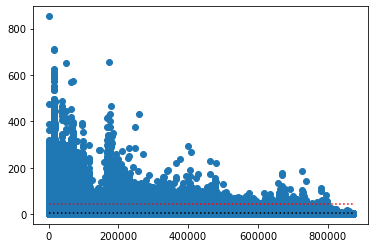

In [5]:
#Plot the pairs and counts to see how the data has changed after combining.
import matplotlib.pylab as plt

xMean = [0,len(FinalLatLon)]


LatLonID = list(range(len(FinalLatLon)))
plt.scatter(LatLonID,FinalLatLon.values())
plt.plot(xMean,[meanCrash,meanCrash],color="black", linestyle=':')
plt.plot(xMean,[meanCrash+3*stdvCrash,meanCrash+3*stdvCrash],color = "red", linestyle=':')

In [7]:
#Consider outliers anything greater than 3 stdvs away from the mean.

outL = defaultdict(int)
for item in FinalLatLon:
    if FinalLatLon[item] > meanCrash+3*stdvCrash:
        outL[item] = FinalLatLon[item]

In [13]:
dill.dump(outL,open('outlierCrash.pkd','wb')) #finally dump the outlier information